# Regularization

## DataSet

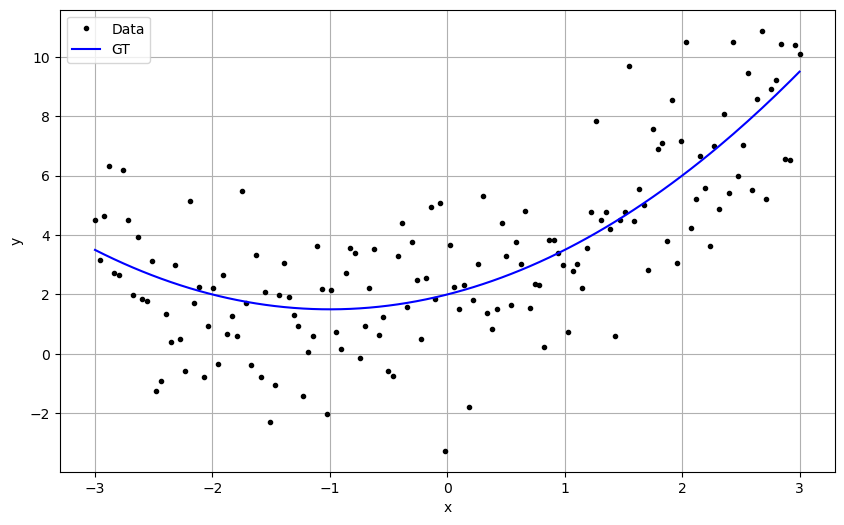

In [1]:
#@title { vertical-output: true}

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
np.random.seed(42)

# Generate synthetic data with noise
m = 150
x = np.linspace(-3, 3, m).reshape(m, 1)
y_gt = 0.5 * x**2 + x + 2
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1) * 2.0  # Higher noise

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## MLE

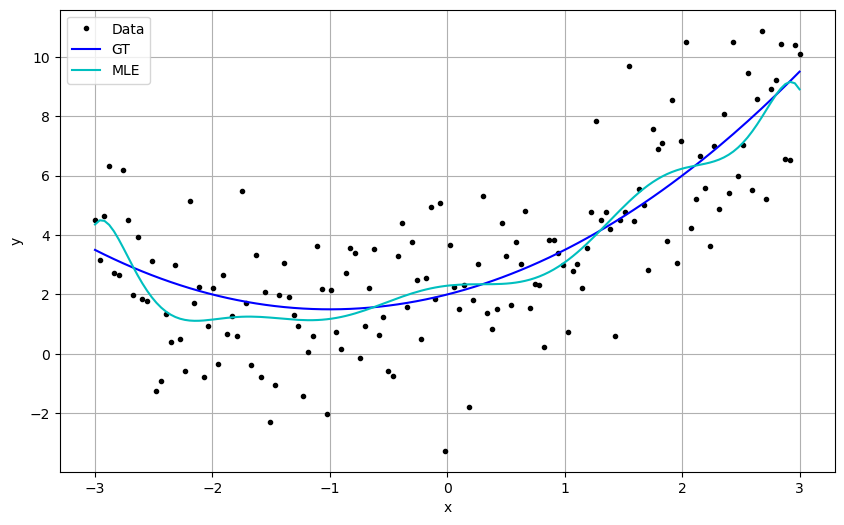

In [2]:
#@title { vertical-output: true}

# MLE: Polynomial (degree=10) + Standardization + Linear Regression
mle_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
mle_reg.fit(x, y)

# Prediction
# y_mle has shape (m, 1) matching y
y_mle = mle_reg.predict(x)

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_mle, "c-", label="MLE")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Ridge (L2)

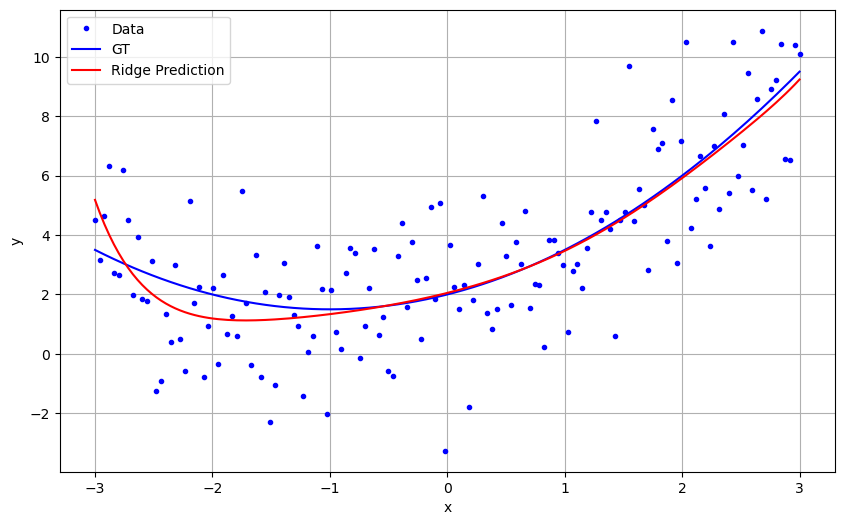

Ridge coefficients:
[ 1.72622928  0.93788978  0.83348626  0.12438646 -0.35709059 -0.02892708
 -0.47010406  0.14358353 -0.05382262  0.22959826]
R² score (MLE): 0.607


In [3]:
#@title { vertical-output: true}

# Ridge: Polynomial (degree=10) + Standardization + Ridge Regression
ridge_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    Ridge(alpha=1.0)
)
ridge_reg.fit(x, y)

# Prediction
# y_ridge has shape (m, 1)
y_ridge = ridge_reg.predict(x)

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "b.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_ridge, "r-", label="Ridge Prediction")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Print coefficients
ridge_coef = ridge_reg.named_steps['ridge'].coef_

print("Ridge coefficients:")
print(ridge_coef)
print(f"R² score (MLE): {r2_score(y, y_ridge):.3f}")

## Lasso (L1)

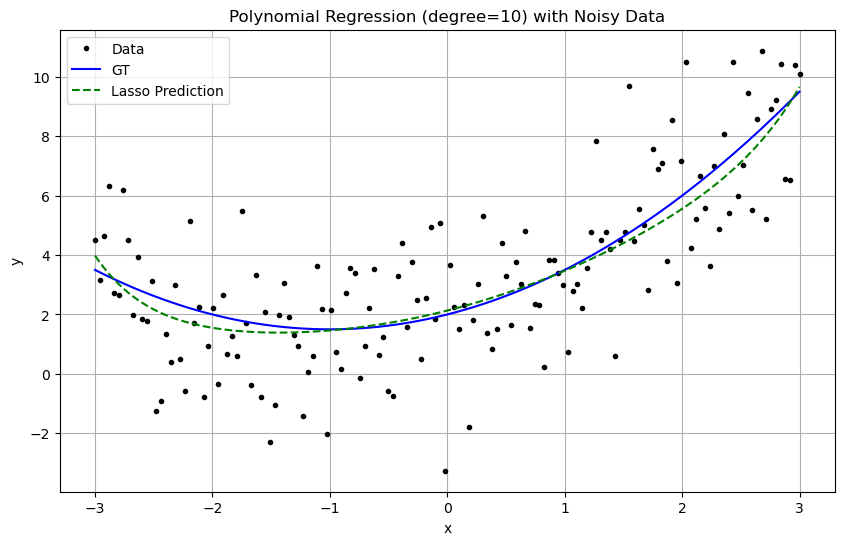


Lasso coefficients: [ 1.74989786  0.90345278  0.          0.04574585 -0.          0.
 -0.          0.34790559 -0.04188836  0.        ]


In [4]:
#@title { vertical-output: true}

# Lasso: Polynomial (degree=10) + Standardization + Lasso Regression
lasso_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=10000)
)
lasso_reg.fit(x, y)

# Prediction
# y_lasso has shape (m, 1)
y_lasso = lasso_reg.predict(x)

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_lasso, "g--", label="Lasso Prediction")
plt.legend()
plt.title("Polynomial Regression (degree=10) with Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Print coefficients
lasso_coef = lasso_reg.named_steps['lasso'].coef_
print(f'\nLasso coefficients: {lasso_coef}')

## Comparison

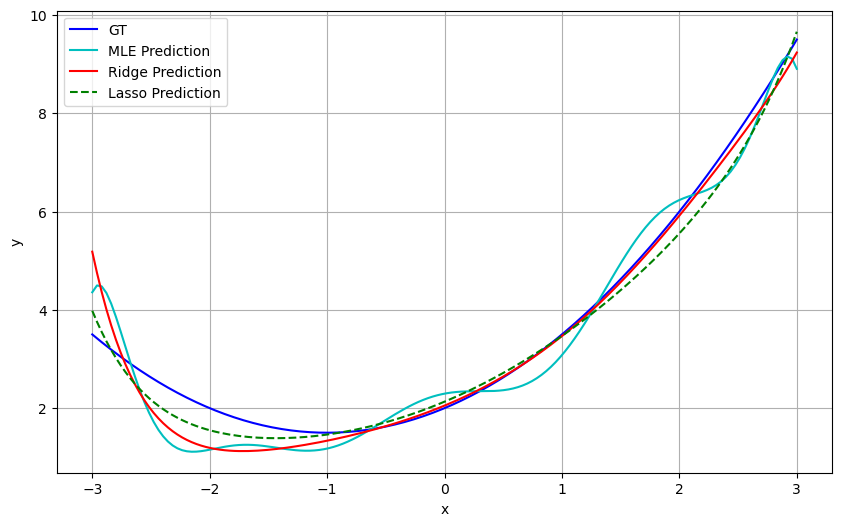

In [5]:
#@title { vertical-output: true}
plt.figure(figsize=(10, 6))
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_mle, "c-", label="MLE Prediction")
plt.plot(x, y_ridge, "r-", label="Ridge Prediction")
plt.plot(x, y_lasso, "g--", label="Lasso Prediction")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()